<a href="https://colab.research.google.com/github/ruby-blu/ruby-blu.github.io/blob/main/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [450]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [451]:
campaign.reset_index()
#campaign = campaign[(campaign['previous'] >= 1)]
campaign['y'].value_counts()

,count
y,
no,32861
yes,4208


In [452]:
bins = [0, 32, 40, 50, 65, 100]

labels = ['Under 32', '32-40', '40-50', '50-65', '65+']

campaign['age_group'] = pd.cut(campaign['age'], bins=bins, labels=labels, right=True)


In [453]:
campaign['job'] = campaign['job'].replace({'entrepreneur':'self-employed', 'housemaid':'services', 'student':'unemployed'}, regex=False)

In [454]:
campaign.drop(['default', 'pdays'], axis=1, inplace=True)

In [455]:
campaign['job'] = campaign['job'].astype('category')
campaign['job_encoded'] = campaign['job'].cat.codes

campaign['marital'] = campaign['marital'].astype('category')
campaign['marital_encoded'] = campaign['marital'].cat.codes

campaign['education'] = campaign['education'].astype('category')
campaign['education_encoded'] = campaign['education'].cat.codes

campaign['contact'] = campaign['contact'].astype('category')
campaign['contact_encoded'] = campaign['contact'].cat.codes

campaign['month'] = campaign['month'].astype('category')
campaign['month_encoded'] = campaign['month'].cat.codes

campaign['day_of_week'] = campaign['day_of_week'].astype('category')
campaign['day_of_week_encoded'] = campaign['day_of_week'].cat.codes

campaign['housing'] = campaign['housing'].astype('category')
campaign['housing_encoded'] = campaign['housing'].cat.codes

campaign['loan'] = campaign['loan'].astype('category')
campaign['loan_encoded'] = campaign['loan'].cat.codes

campaign['poutcome'] = campaign['poutcome'].astype('category')
campaign['poutcome_encoded'] = campaign['poutcome'].cat.codes

campaign['y'] = campaign['y'].astype('category')
campaign['y_encoded'] = campaign['y'].cat.codes

campaign['age_group'] = campaign['age_group'].astype('category')
campaign['age_group_encoded'] = campaign['age_group'].cat.codes

campaign.drop(['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'housing', 'loan', 'poutcome', 'y', 'age_group'], axis=1, inplace=True)
campaign.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_encoded,marital_encoded,education_encoded,contact_encoded,month_encoded,day_of_week_encoded,housing_encoded,loan_encoded,poutcome_encoded,y_encoded,age_group_encoded
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,5,1,0,1,6,1,0,0,1,0,3
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,5,1,3,1,6,1,0,0,1,0,3
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,5,1,3,1,6,1,2,0,1,0,1
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,1,6,1,0,0,1,0,1
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,5,1,3,1,6,1,0,2,1,0,3


In [456]:
#df = campaign.groupby('y_encoded').head(1365)

In [457]:
X = campaign.drop(columns='y_encoded')

In [458]:
y = campaign['y_encoded']

In [459]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [460]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4, class_weight='balanced')

In [461]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

In [462]:
test_predictions = clf.predict(X_test)
test_predictions

array([0, 0, 1, ..., 0, 1, 0], dtype=int8)

In [463]:
y_test

,y_encoded
28597,0
4984,0
34977,0
17191,0
441,0
...,...
15841,0
24006,0
31863,1
25506,0


In [464]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predictions)

0.8610736444564338

[Text(0.5, 0.9, 'x[7] <= 5087.65\ngini = 0.5\nsamples = 29655\nvalue = [14827.5, 14827.5]'),
 Text(0.25, 0.7, 'x[16] <= 1.5\ngini = 0.238\nsamples = 3591\nvalue = [1130.658, 7065.603]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[11] <= 0.5\ngini = 0.302\nsamples = 2771\nvalue = [1003.403, 4414.328]'),
 Text(0.0625, 0.3, 'x[7] <= 5013.1\ngini = 0.28\nsamples = 2309\nvalue = [800.132, 3963.522]'),
 Text(0.03125, 0.1, 'gini = 0.222\nsamples = 754\nvalue = [227.483, 1562.199]'),
 Text(0.09375, 0.1, 'gini = 0.311\nsamples = 1555\nvalue = [572.649, 2401.323]'),
 Text(0.1875, 0.3, 'x[12] <= 0.5\ngini = 0.428\nsamples = 462\nvalue = [203.271, 450.806]'),
 Text(0.15625, 0.1, 'gini = 0.055\nsamples = 16\nvalue = [1.689, 58.025]'),
 Text(0.21875, 0.1, 'gini = 0.448\nsamples = 446\nvalue = [201.581, 392.781]'),
 Text(0.375, 0.5, 'x[7] <= 5049.85\ngini = 0.087\nsamples = 820\nvalue = [127.255, 2651.275]'),
 Text(0.3125, 0.3, 'x[1] <= 3.5\ngini = 0.074\nsamples = 661\nvalue = [90.092, 2236.1

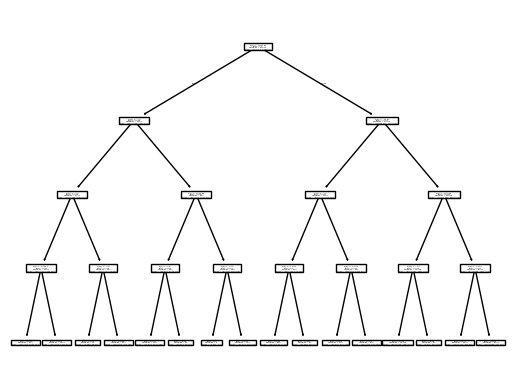

In [465]:
tree.plot_tree(clf)

In [466]:
test_hold = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")

In [467]:
test_hold.reset_index()
bins = [0, 32, 40, 50, 65, 100]
labels = ['Under 32', '32-40', '40-50', '50-65', '65+']
test_hold['age_group'] = pd.cut(test_hold['age'], bins=bins, labels=labels, right=True)
test_hold['job'] = test_hold['job'].replace({'entrepreneur':'self-employed', 'housemaid':'services', 'student':'unemployed'}, regex=False)
test_hold.drop(['default', 'pdays'], axis=1, inplace=True)
test_hold['job'] = test_hold['job'].astype('category')
test_hold['job_encoded'] = test_hold['job'].cat.codes

test_hold['marital'] = test_hold['marital'].astype('category')
test_hold['marital_encoded'] = test_hold['marital'].cat.codes

test_hold['education'] = test_hold['education'].astype('category')
test_hold['education_encoded'] = test_hold['education'].cat.codes

test_hold['contact'] = test_hold['contact'].astype('category')
test_hold['contact_encoded'] = test_hold['contact'].cat.codes

test_hold['month'] = test_hold['month'].astype('category')
test_hold['month_encoded'] = test_hold['month'].cat.codes

test_hold['day_of_week'] = test_hold['day_of_week'].astype('category')
test_hold['day_of_week_encoded'] = test_hold['day_of_week'].cat.codes

test_hold['housing'] = test_hold['housing'].astype('category')
test_hold['housing_encoded'] = test_hold['housing'].cat.codes

test_hold['loan'] = test_hold['loan'].astype('category')
test_hold['loan_encoded'] = test_hold['loan'].cat.codes

test_hold['poutcome'] = test_hold['poutcome'].astype('category')
test_hold['poutcome_encoded'] = test_hold['poutcome'].cat.codes

test_hold['age_group'] = test_hold['age_group'].astype('category')
test_hold['age_group_encoded'] = test_hold['age_group'].cat.codes

test_hold.drop(['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'housing', 'loan', 'poutcome', 'age_group'], axis=1, inplace=True)

In [468]:
th_predictions = clf.predict(test_hold)
my_predictions = pd.DataFrame(th_predictions, columns = ['predictions'])
my_predictions.value_counts()

,count
predictions,
0,349
1,61


In [469]:
my_predictions.to_csv("team1-module2-predictions.csv",index=False)